# **PMR3508 - Exercício Programa 02**: <br> **Redes Neurais e o Dataset MNIST**

---

---

## ✏️ **Cabeçalho**:



### **Nome**: Nathália Yukimi Uchiyama Tsuno

### **NUSP**: 14600541

### **Hash**: 30



---

## 📜 **Descrição:**



Neste exercício, você irá trabalhar com o **dataset MNIST**, um conjunto de dados com 70.000 imagens de dígitos escritos à mão. Seu objetivo será aplicar os conceitos de **Redes Neurais Artificiais (ANNs)** vistos na aula teórica. Este EP está dividido em tarefas, sua formatação não deve ser alterada, mas novas células de código ou texto podem ser criadas nos blocos de cada tarefa.



---

## ⚠️ **Instruções:**

- Complete todas as tarefas abaixo, respondendo às perguntas e escrevendo o código necessário.

- Comente seu código para facilitar a correção.

- Entregue o notebook no formato `.ipynb`.



---




## ✅ **Tarefas:**



1. **Probabilidades de dígitos no *dataset***       ⇒ `2 pontos`

2. **Análise Exploratória de Dados (EDA)**          ⇒ `2 pontos`

3. **Treinamento e teste de Modelos**               ⇒ `2 pontos`

4. **Comunicação de Resultados e Visualizações**    ⇒ `2 pontos`

5. **Publicação no *Kaggle* e Documentação**        ⇒ `2 pontos`



---



<br>

<center>

        <h1>

        <b>

        BOA SORTE !!!

        </b>

        </h1>

</center>

<br>



---

---

## ⏳ Loading dos Dados

In [1]:
import pickle

import random

import numpy as np

import os

from os.path import join



# Configuração de seeds para replicabilidade

np.random.seed(42)  # Seed para NumPy

random.seed(42)     # Seed para o módulo random



input_path = os.getcwd()  # Obtém o diretório atual

"""

O diretório atual é o de saída e não contém o DataSet :(

images_filepath = join(input_path, 'MNIST-images.pkl')

labels_filepath = join(input_path, 'MNIST-labels.pkl')

validation_images_filepath = join(input_path, 'MNIST-validation-images.pkl')

"""

images_filepath = '/kaggle/input/pmr3508-mnist/MNIST-images.pkl'

labels_filepath = '/kaggle/input/pmr3508-mnist/MNIST-labels.pkl'

validation_images_filepath = '/kaggle/input/pmr3508-mnist/MNIST-validation-images.pkl'

with open(images_filepath, 'rb') as f:

    X_tot = pickle.load(f)



with open(labels_filepath, 'rb') as f:

    y_tot = pickle.load(f)



with open(validation_images_filepath, 'rb') as f:

    X_val = pickle.load(f)

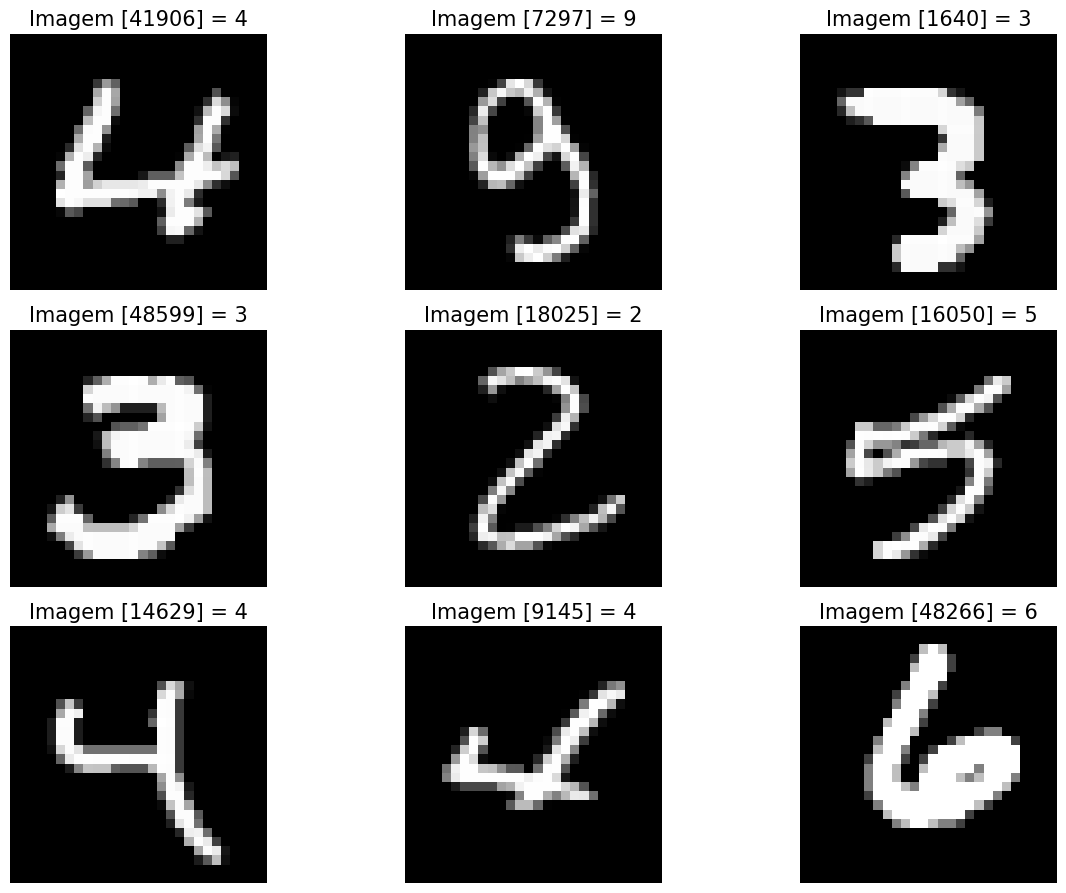

In [2]:
'''

TESTE DE CARREGAMENTO DO DATASET POR VISUALIZAÇÃO

Este bloco visualiza algumas imagens do dataset MNIST para verificar se o

carregamento foi realizado corretamente.

'''



%matplotlib inline

import random

import matplotlib.pyplot as plt



def show_images(images, title_texts):

    # Função para mostrar as imagens com seus respectivos títulos

    cols = 3  # Número de colunas na visualização

    rows = int(len(images) / cols) + 1  # Calcula o número de linhas

    plt.figure(figsize=(12, 12))  # Define o tamanho da figura

    index = 1

    for x in zip(images, title_texts):  # Itera sobre as imagens e títulos

        image = x[0]

        title_text = x[1]

        plt.subplot(rows, cols, index)  # Adiciona um subplot

        plt.axis('off')  # Desativa os eixos

        plt.imshow(image, cmap=plt.cm.gray)  # Mostra a imagem em escala de cinza

        if (title_text != ''):

            plt.title(title_text, fontsize=15)  # Define o título da imagem

        index += 1

    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de títulos

    plt.show()  # Exibe a figura com as imagens e títulos



images_2_show = []  # Lista para armazenar as imagens a serem mostradas

titles_2_show = []  # Lista para armazenar os títulos das imagens

# Seleciona aleatoriamente 9 imagens de treino

for i in range(0, 9):

    r = random.randint(1, 60000)

    images_2_show.append(X_tot[r])  # Adiciona a imagem selecionada à lista

    titles_2_show.append(f"Imagem [{str(r)}] = {str(y_tot[r])}")  # Adiciona o título correspondente



show_images(images_2_show, titles_2_show)  # Exibe as imagens selecionadas

# 0️⃣ Suas bibliotecas

In [3]:
"""
Bibliotecas de Manipulação de Dados
"""
import pandas as pd

"""
Bibliotecas de Plotagem
"""
import matplotlib.pyplot as plt
import seaborn as sns

"""
Bibliotecas de Processamento de Dados
"""
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

"""
Biblioteca de Treinamento de Modelos
"""
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

"""
Bibliotecas para Métricas de Avaliação
"""
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error

# 1️⃣ Tarefa 01: Probabilidades 🎲

In [4]:
"""
Setagem do Hash
"""

hash = 30

## 🧑🏻‍💻 Item a)



Descubra o número do Dataset associado ao seu Hash.


# Em Busca do Hash Perdido

Verifique que, tal como um dicionário, para todo índice i, y_tot[i] associa uma label para a imagem do número descrito em X_tot[i].

Para encontrar o número do Dataset associado ao meu hash (30), então i = 30.

In [5]:
"""
My_Hash DataSet

Função que recebe como parâmetros o seu hash
Encontra a imagem e o número do Dataset associado ao seu hash
Void, imprime um título com seu número associado ao seu hash e a imagem dele
"""

def My_Hash_DataSet(hash):

    # Encontra a imagem e o número do Dataset associado ao seu hash
    ImagemAssocAoHash_Matriz = X_tot[hash]
    ImagemAssocAoHash_Target = y_tot[hash]

    title = "O número do Dataset associado ao meu hash (" + str(hash) + ") é: " + str(ImagemAssocAoHash_Target)
    
    plt.title(title, fontsize=16, color='red')
    
    plt.axis('off')
    plt.imshow(ImagemAssocAoHash_Matriz, cmap=plt.cm.gray)
    plt.show()

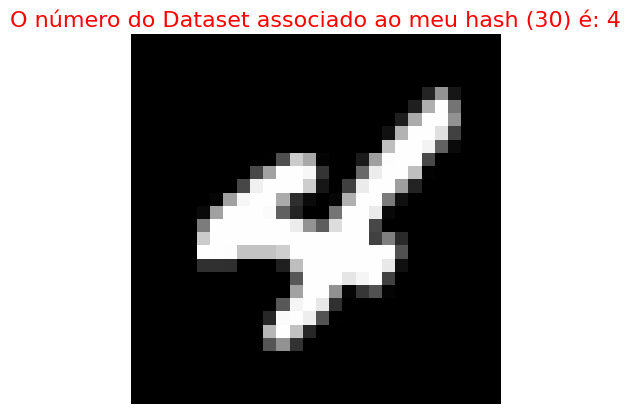

In [6]:
"""
Impressão de Resultados
"""

My_Hash_DataSet(hash)

## 🔦 Item b)



Determine, para a imagem vinculada ao seu Hash, qual é a Probabilidade de um píxel claro (128 - 225) para esta única imagem?

# Probabilidade do Pixel Claro

Vamos aplicar a fórmula de proporção de pixels: $\cfrac{Quantidade\_de\_Pixels\_Claros}{Quantidade\_de\_Pixels}$. Para cada elemento da matriz em questão, vamos aplicar um iterador para contabilizar todos os pixels claros.

In [7]:
"""
Find_Claro

Função que recebe uma imagem do Dataset
Encontra o número de pixels claros
    Itera por toda imagem e contabiliza todo pixel contido entre 128 e 255
Retorna esse valor
"""
def Find_Claro(Imagem_Matriz):
    Pixel_claro = 0
    
    for linha in Imagem_Matriz:
        for px in linha:
            if px >= 128 and px <= 255:
                Pixel_claro += 1

    return Pixel_claro

In [8]:
"""
Number_of_Pixels

Função que recebe uma imagem
Encontra o número total de pixels
    O número total de pixels é dada pela quantidade de linhas pela quantidade de pixels individualmente.
Retorna esse valor
"""
def Number_of_Pixels(Imagem_Matriz):
    return len(Imagem_Matriz)*len(Imagem_Matriz[0])

In [9]:
"""
Impressão de Resultados

Aplicamos uma fração simples entre o número de pixels claros e o total de pixels.
"""

# Setagem da imagem para essa questão
ImagemAssocAoHash_Matriz_Q1b = X_tot[hash]

print("A probabilidade de um pixel claro para a imagem vinculada ao meu hash,", hash, ", é de", Find_Claro(ImagemAssocAoHash_Matriz_Q1b)/Number_of_Pixels(ImagemAssocAoHash_Matriz_Q1b))

A probabilidade de um pixel claro para a imagem vinculada ao meu hash, 30 , é de 0.15433673469387754


## ♟️ Item c)



Qual é a probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a)?

# Seleção da Classe

A priori, vamos contabilizar quantas imagens tem a mesma label que o meu hash (30).

Façamos isso via busca sequencial, dado que o DataSet não está ordenado. Então, vamos contabilizar todas as imagens tal que y[i] = 4.

In [10]:
"""
Setagem da Classe
"""

classe = y_tot[hash]

In [11]:
"""
Find_Claro_in_Class

Função que recebe uma classe
Encontra o número de pixels claros dentro da classe estipulada no Dataset
    Itera por todo o Dataset e faz o somatório de todos os pixels claros da classe
Retorna esse valor
"""
def Find_Claro_in_Class(classe):
    Pixel_Claro = 0
    
    for i in range(len(y_tot)):
        if(y_tot[i] == classe):
            Pixel_Claro += Find_Claro(X_tot[i])

    return Pixel_Claro

In [12]:
"""
Number_of_Pixels_in_Class

Função que recebe uma classe
Encontra o número total de pixels dessa classe
    O número total de pixels é dada pela quantidade de linhas pela quantidade de pixels individualmente.
Retorna esse valor
"""

def Number_of_Pixels_in_Class(classe):
    number_of_pixels_in_class = 0
    n_c = 0
    
    for i in range(len(y_tot)):
        if(y_tot[i] == classe):
            n_c += 1
            number_of_pixels_in_class += Number_of_Pixels(X_tot[i])

    print(n_c)

    return number_of_pixels_in_class

In [13]:
"""
Cálculo da Probabilidade

Aplicamos o cálculo da Máxima Verossimilhança: #Pixels_Claros/#Pixels_Totais
"""

# Setagem de argumentos
Pixel_Claro_Q1c = Find_Claro_in_Class(classe)

Quantidade_Total_Q1c = Number_of_Pixels_in_Class(classe)
print(Quantidade_Total_Q1c)

print("A probabilidade de um pixel claro para a mesma classe,", classe, ", da minha imagem obtida em (a) é de", Pixel_Claro_Q1c/Quantidade_Total_Q1c)

5918
4639712
A probabilidade de um pixel claro para a mesma classe, 4 , da minha imagem obtida em (a) é de 0.12275460200977992


---

# 2️⃣ Tarefa 02: Análise Exploratória de Dados 📊

## ✨ Item a)



Conte quantas vezes cada dígito (de 0 a 9) aparece e responda:



1. Todos os dígitos aparecem a mesma quantidade?



2. Qual o valor médio dos píxeis de cada dígito?

In [14]:
"""
Quantificação de Dados

Setagem inicial de um dataset que contenha todas as labels
"""

arrLabel = pd.read_pickle(labels_filepath)

dfLabel = pd.DataFrame({ "label" : arrLabel })

# Item A - Parte 1

A priori, vamos contabilizar a frequência de cada dígito.

Faremos isso via iteração por todo Dataset em y_tot, calculando num vetor de frequências,
setado inicialmente em zero para os dígitos $\{0, 1, 2, 3, 4, 5, 6, 7, 8, 9\}$, acrescendo a um sempre que y_tot[i] for esse valor.

In [15]:
"""
Freq_Counter

Recebe um dataset e a coluna desejada
Encontra a frequência para cada dígito, dada determinada coluna
    Cria um vetor com o número de elementos da coluna do DataFrame
    Itera pelo Dataframe e vai acrescendo no vetor de frequências.
    Por exemplo, se df['coluna'] = i, somamos freq[i]++
Retorna um vetor com esses valores
"""

def Freq_Counter_Dig(df, coluna):

    arrLabels = df[coluna].unique()
    
    freq = [0]*len(arrLabels)

    for elemento in df[coluna]:
        freq[elemento] += 1

    return freq

In [16]:
"""
Plot_Freq_Label

Recebe um dataframe e a coluna referida
Imprime a frequência de cada dígito na determinada coluna do Dataframe
    Utiliza o método .value_counts() do pandas
"""

def Plot_Freq_Label(df, coluna):
    display(df[coluna].value_counts())

In [17]:
"""
Plot_Freq

Recebe um dataframe e uma coluna específica
Encontra o vetor de frequências do elemento
Faz a plotagem de frequências de cada elemento
"""

def Plot_Freq(dfAnt, coluna):

    # Vetor de frequencias
    vfreq = Freq_Counter_Dig(dfAnt, coluna)

    # Setagem inicial de dígitos
    elem = []
    for dig in range(len(vfreq)):
        elem.append(dig)

    # Setagem do DataFrame
    df = pd.DataFrame({
        "digit" : elem,
        "freq" : vfreq
    })

    sns.barplot(df, x = "digit", y = "freq", palette = sns.color_palette("flare", len(vfreq)))
    plt.title("Distribuição de dígitos do DataFrame")

In [18]:
"""
Pela protagem do Pandas: simples, mas, eficiente
"""

Plot_Freq_Label(dfLabel, 'label')

label
1    6725
7    6238
3    6107
2    6023
9    5922
0    5920
4    5918
6    5915
8    5856
5    5376
Name: count, dtype: int64

Frequência dos dígitos

O dígito 0 tem frequência 5920
O dígito 1 tem frequência 6725
O dígito 2 tem frequência 6023
O dígito 3 tem frequência 6107
O dígito 4 tem frequência 5918
O dígito 5 tem frequência 5376
O dígito 6 tem frequência 5915
O dígito 7 tem frequência 6238
O dígito 8 tem frequência 5856
O dígito 9 tem frequência 5922



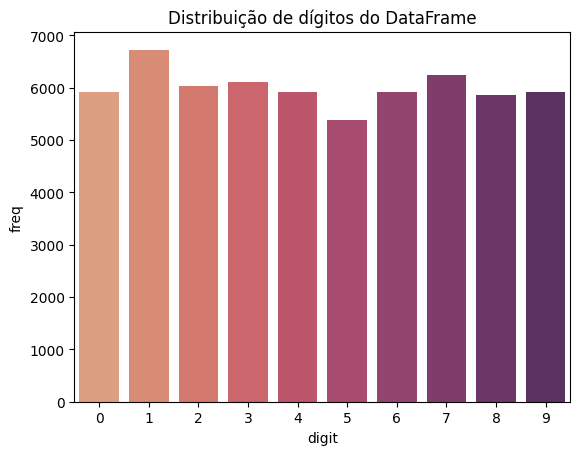

In [19]:
"""
Pela nossa plotagem
"""

print("Frequência dos dígitos\n")

freq_Q2a = Freq_Counter_Dig(dfLabel, 'label')
i = 0

for qtd in freq_Q2a:
    print("O dígito", i, "tem frequência", qtd)
    i += 1

print()

Plot_Freq(dfLabel, 'label')

### Resposta 01:

Como observado anteriormente, os dígitos tem as frequências:

*Dígito* | *Frequência*
:-: | :-:
0 | 5920
1 | 6725
2 | 6023
3 | 6107
4 | 5918
5 | 5376
6 | 5915
7 | 6238
8 | 5856
9 | 5922

Verifique que as frequências não são exatamente iguais. Contudo, são bem próximas entre si.

O dígito com menor frequência é "5", com 5376 representantes. Por outro lado, o dígito com maior frequência é "1", com 6725 representantes.

# Item A - Parte 2

Iterando-se pelo Dataset de imagens, vamos reunir as médias de cada classe de imagem num array final

Subdivindindo-se por lemas, vamos ter algumas funções auxiliares

Função | Descrição
:-: | :-:
Sum_Px_By_Img | Faz o trabalho, de fato, retornando a soma de pixels de uma dada imagem
Mean_Px_By_Class | Reune a soma de todas as imagens de determinada soma e extrai a média pelo número de pixels totais
Mean_Px | Agrupa todas as médias num array de médias, onde a i-ésima posição corresponde ao i-ésimo dígito

## Plotagem

Com auxílio da biblioteca SeaBorn, plotamos um tabela e um gráfico de barras, contendo as devidas distribuições de médias dos pixels dos dígitos

In [20]:
"""
Sum_Px_By_Img

Recebe uma matriz de pixels
Retorna a soma de todos os pixels
"""

def Sum_Px_By_Img(Matriz_Img):

    # Setagem inicial so somatório
    sum = 0

    for linha in Matriz_Img:
        for px in linha:
            sum += px

    return sum

In [21]:
"""
Mean_Px_By_Class

Recebe um Dataset de Imagens, um Dataset com seu respectivo Target e uma classe
Devolve a média dos pixels dessa classe
"""

def Mean_Px_By_Class(Dataset_Img, Dataset_Target, Classe):

    # Setagem das variáveis de soma
    sum = 0
    num_of_rep = 0

    for i in range(len(Dataset_Target)):
        if Classe == Dataset_Target[i]:
            sum += Sum_Px_By_Img(Dataset_Img[i])
            num_of_rep += 1

    return sum/(num_of_rep*len(Dataset_Img[0])*len(Dataset_Img[0][0]))

In [22]:
"""
Mean_Px

Recebe um Dataset de Imagens, um Dataset com seu respectivo Target
Devolve um array com as médias dos pixels de cada dígito
"""

def Mean_Px(Dataset_Img, Dataset_Target):
    
    # Setagem dos labels para um Dataframe
    df = pd.DataFrame({
        "label" : Dataset_Target
    })

    # Setagem dos valores possíveis de dígitos
    digit = df['label'].unique()
    digit_sort = np.sort(digit)

    # Setagem do array de médias
    mean = np.zeros(len(digit_sort))

    for classe in digit_sort:
        mean[classe] = Mean_Px_By_Class(Dataset_Img, Dataset_Target, classe)

    return mean

In [23]:
"""
Plot_Mean_Px

Recebe um Dataset de Imagens, um Dataset com seu respectivo Target
Faz a plotagem de média dos pixels de cada dígito
"""
def Plot_Mean_Px(Dataset_Img, Dataset_Target):

    # Vetor de frequencias
    mean = Mean_Px(Dataset_Img, Dataset_Target)

    # Setagem inicial de dígitos
    digits = np.zeros(len(mean))
    for i in range(len(mean)):
        digits[i] = i

    # Setagem do DataFrame
    df = pd.DataFrame({
        "digit" : digits,
        "mean" : mean
    })

    sns.barplot(df, x = "digit", y = "mean", palette = sns.color_palette("twilight", len(mean)))
    plt.title("Distribuição da Média dos Pixels de Cada Dígito do Dataset")
    plt.show()

In [24]:
"""
Label_Mean_Px

Recebe um Dataset de Imagens, um Dataset com seu respectivo Target
Descreve a média de pixels de cada dígito
"""

def Label_Mean_Px(Dataset_Img, Dataset_Target):

    # Vetor de frequencias
    mean = Mean_Px(Dataset_Img, Dataset_Target)

    print("A Média dos Pixels Dos Dígitos\n")
    for i in range(len(mean)):
        print("O dígito", i, "tem a média dos pixels de", mean[i])

A Média dos Pixels Dos Dígitos

O dígito 0 tem a média dos pixels de 44.22823359073359
O dígito 1 tem a média dos pixels de 19.402653250891433
O dígito 2 tem a média dos pixels de 38.02123789080633
O dígito 3 tem a média dos pixels de 36.232239350628085
O dígito 4 tem a média dos pixels de 31.04155990716665
O dígito 5 tem a média dos pixels de 32.92402884702988
O dígito 6 tem a média dos pixels de 35.24354050580503
O dígito 7 tem a média dos pixels de 29.255536753014766
O dígito 8 tem a média dos pixels de 38.40304009667391
O dígito 9 tem a média dos pixels de 31.339627530343446



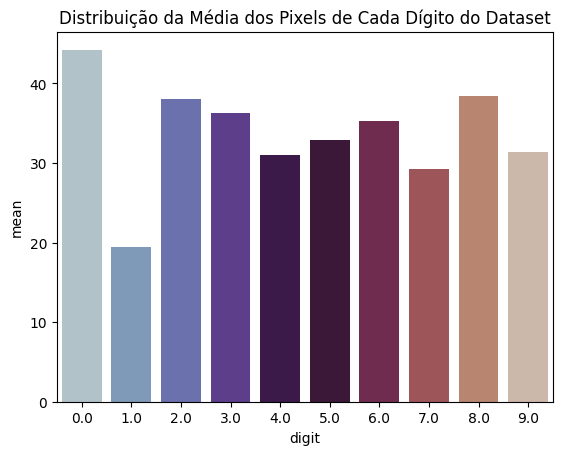

In [25]:
"""
Impressão dos Resultados
"""

# Impressão de uma Label contendo os valores
Label_Mean_Px(X_tot, y_tot)
print()

# Impressão de um histograma
Plot_Mean_Px(X_tot, y_tot)

### Resposta 02:

Como observado pelas estruturas gráficas, as médias dos pixels é dada da forma

Dígito | Média dos Pixels
:-: | :-:
0 | 44.22
1 | 19.40
2 | 38.02
3 | 36.23
4 | 31.04
5 | 32.92
6 | 35.24
7 | 29.25
8 | 38.40
9 | 31.33

Como é possível observar, a distribuição não é tão uniforme entre os dígitos. O que possui maior média é o número "0" e o que possui menor, "1".

#### Possíveis Deduções

Pelo formato do corpo da imagem, o dígito "1" tem um shape mais fino e que requer menor pixels do que os demais. Isso pode acarretar numa média de pixels menor, como observado. O mesmo ocorre com o "7".

Por outro lado, valores como "0" ou "8" tem um shape mais robusto, exigindo uma maior área e mais pixels em sua escrita. Consequentemente, temos médias de pixels maiores para esses dígitos.

## 📏 Item b)



Faça um histograma que mostre a distribuição dos valores dos píxeis para cada dígito. Há muitos valores que são “apagados” (ou seja, com valor 0) ou a distribuição dos valores é mais equilibrada entre os dígitos?


In [26]:
"""
Dist_Pixel_By_Img

Recebe um matriz de pixels e o número de pixels possíveis (Com placeholder 256 pixels)
Itera pelos pixels da imagem e soma na sua devida posição no array
Retorna um np.array com as devidas distribuições de pixels desssa imagem
"""

def Dist_Pixel_By_Img(Matriz_Px, n = 256):

    # Setagem do array de distribuições
    dist_px = np.zeros(n)

    for linha in Matriz_Px:
        for px in linha:
            dist_px[px] += 1

    return dist_px

In [27]:
"""
Dist_Pixel_By_Class

Recebe uma classe, um Dataset de imagens, um Dataset dos targets dessas imagens e o número de pixels possíveis (Com placeholder 256 pixels)
Itera pelas imagens e retorna a distribuição de pixels dessa classe
Retorna um np.array com as devidas distribuições
"""

def Dist_Pixel_By_Class(Classe, Dataset_Img, Dataset_target, n = 256):

    # Setagem do array de distribuições
    dist_px = np.zeros(n)

    for i in range(len(Dataset_target)):
        if Dataset_target[i] == Classe:
            dist_px += Dist_Pixel_By_Img(Dataset_Img[i], n)

    return dist_px

In [28]:
"""
Dist_Pixel_Digit

Recebe  um Dataset de imagens, um Dataset dos targets dessas imagens e o número de pixels possíveis (Com placeholder 256 pixels)
Itera pelo dataset e retorna uma matriz com as distribuições dos dígitos
"""

def Dist_Pixel_Digit(Dataset_Img, Dataset_target, n = 256):
    # Setagem dos labels para um Dataframe
    df = pd.DataFrame({
        "label" : Dataset_target
    })

    # Setagem dos valores possíveis de dígitos
    digit = df['label'].unique()
    digit_sort = np.sort(digit)

    # Setagem do array de distribuições
    Dist = []

    for i in range(len(digit_sort)):
        Dist.append([])

    for digito in digit_sort:
        Dist[digito] = Dist_Pixel_By_Class(digito, Dataset_Img, Dataset_target, n)

    return Dist

In [29]:
"""
Plot_Dist_Pixel

Recebe um array de distribuição de pixels e o dígito respectivo
Retorna um histograma
"""

def Plot_Dist_Pixel(dist, digit):
    # Setagem dos tipos de pixels
    px_type = np.zeros(len(dist))

    for i in range(len(dist)):
        px_type[i] = i

    # Setagem do DataFrame
    df = pd.DataFrame({
        "pixel" : px_type,
        "distribuição" : dist
    })

    plt.figure(figsize=(140, 10))
    sns.barplot(df, x = "pixel", y = "distribuição", palette = sns.color_palette("flare", len(dist)))

    title = "Distribuição de pixels do dígito " + str(digit) + " no DataFrame"
    plt.title(title, fontsize=70, color='red')
    plt.show()

In [30]:
"""
Plot_Dist_Pixel_Digit

Recebe um dataset de imagens, um dataset de targets respectivos e o número de pixels possíveis (Com placeholder 256 pixels)
Retorna d histogramas com as distribuições 
"""

def Plot_Dist_Pixel_Digit(Dataset_Img, Dataset_Target, n = 256):

    # Setagem da Matriz de Distribuições
    Matriz_Dist = Dist_Pixel_Digit(Dataset_Img, Dataset_Target, n)

    for i in range(len(Matriz_Dist)):
        Plot_Dist_Pixel(Matriz_Dist[i], i)
        print()

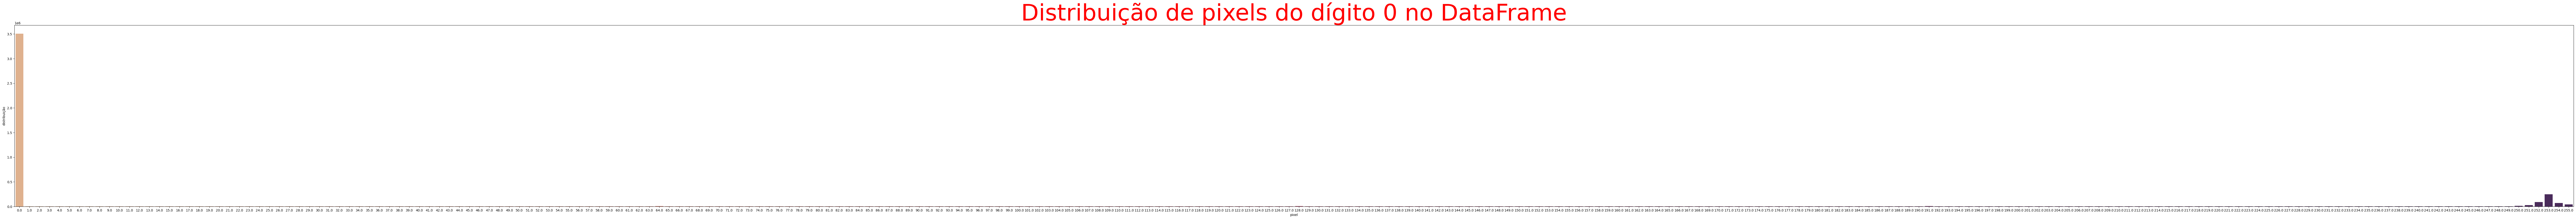

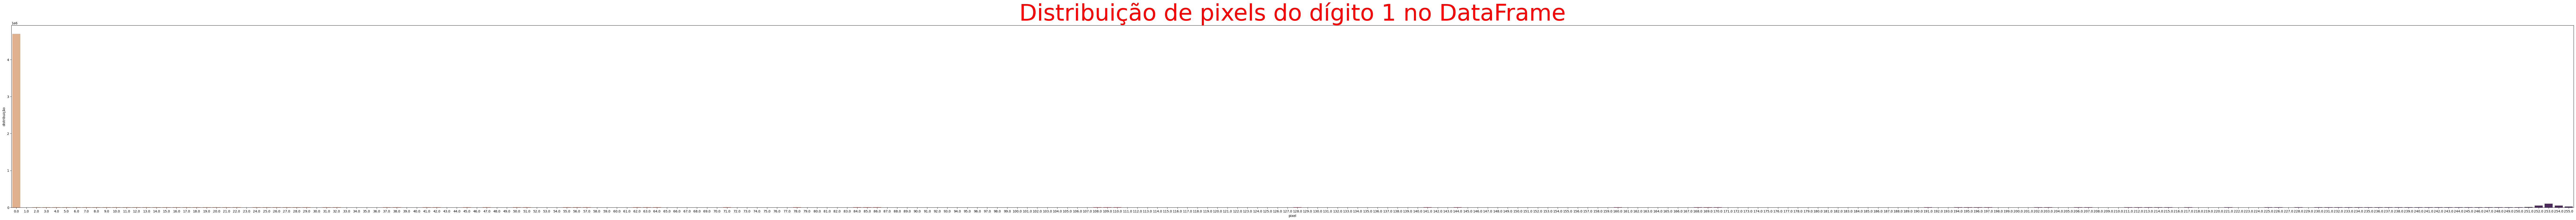

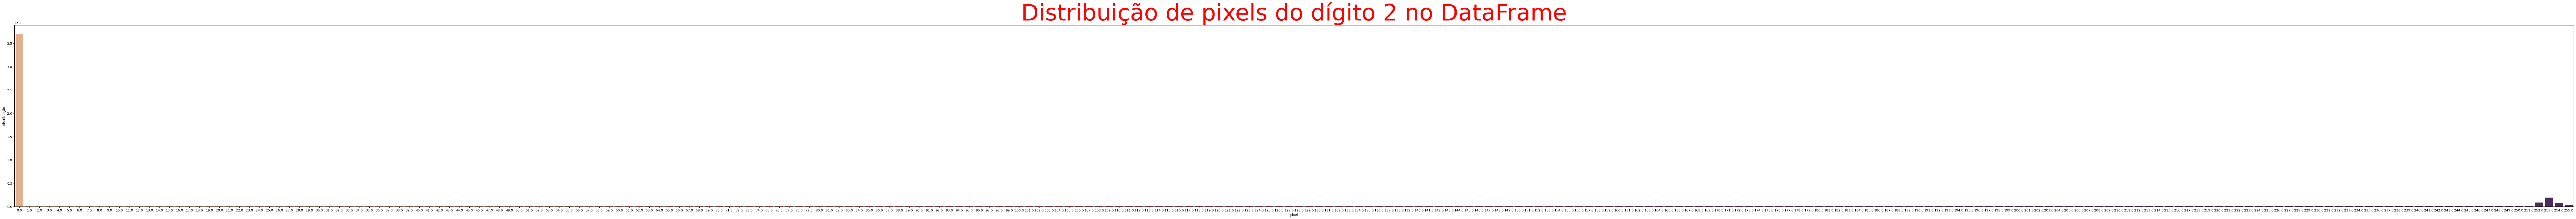

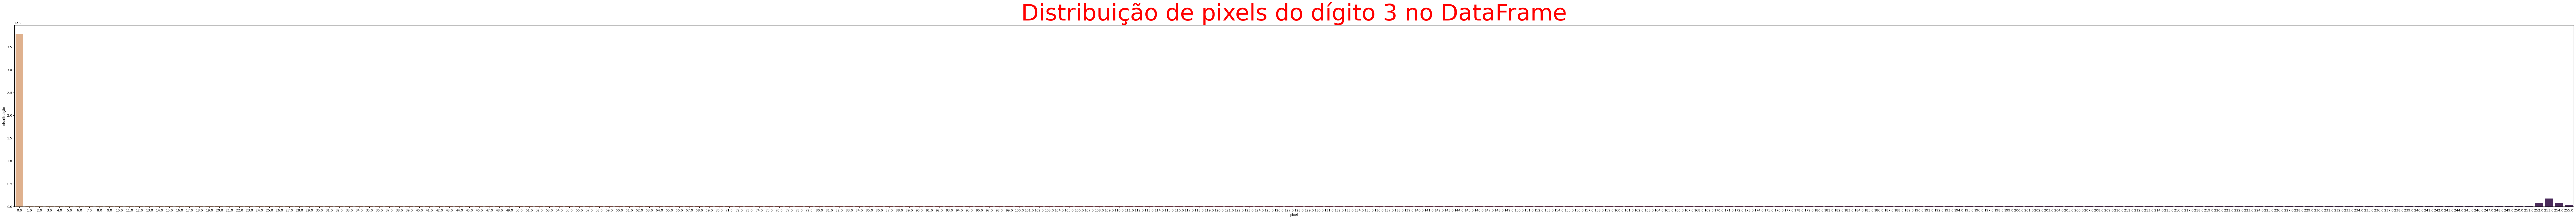

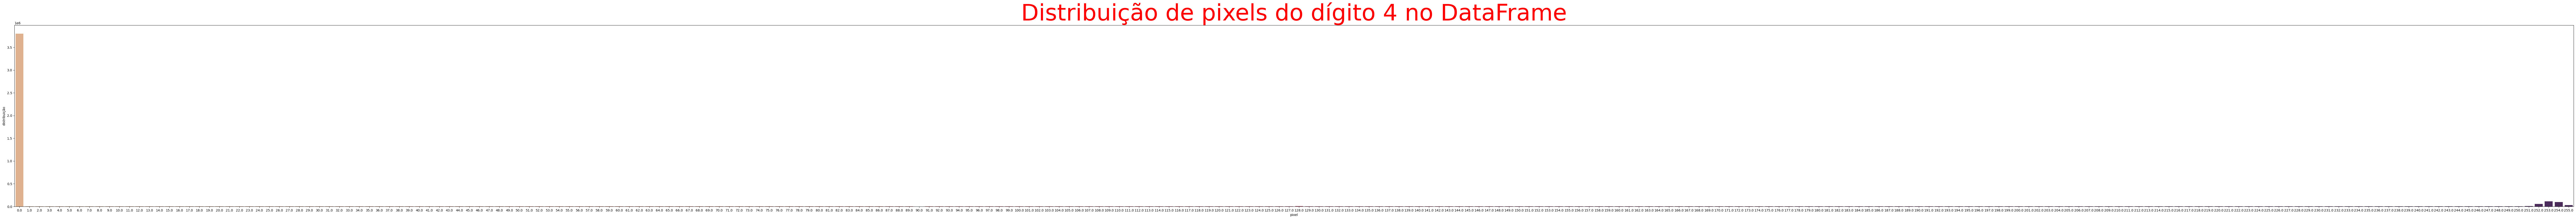

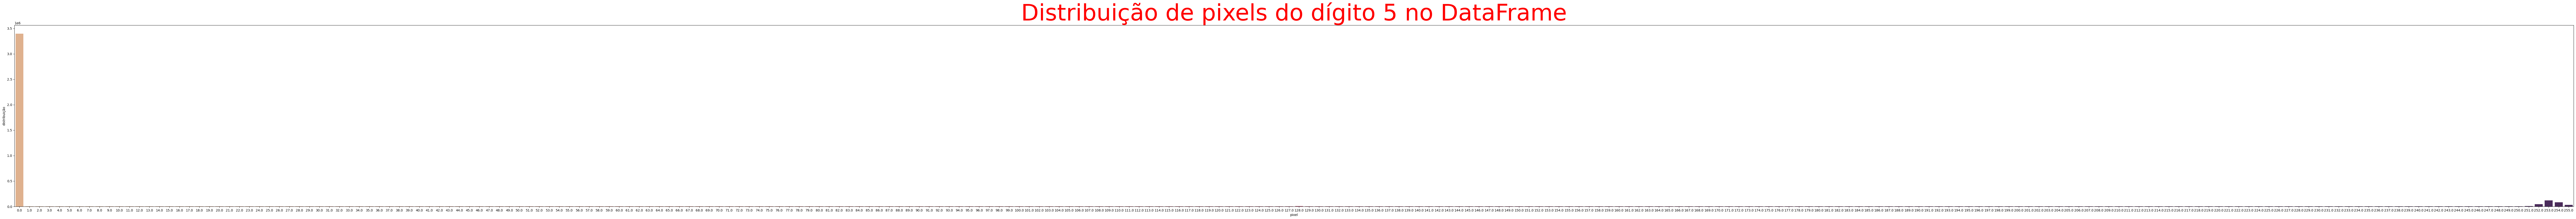

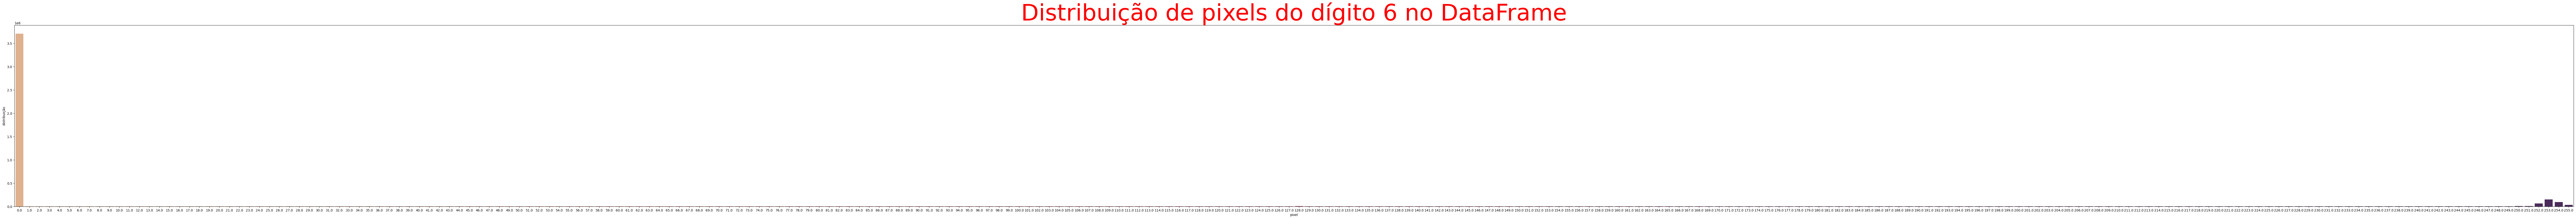

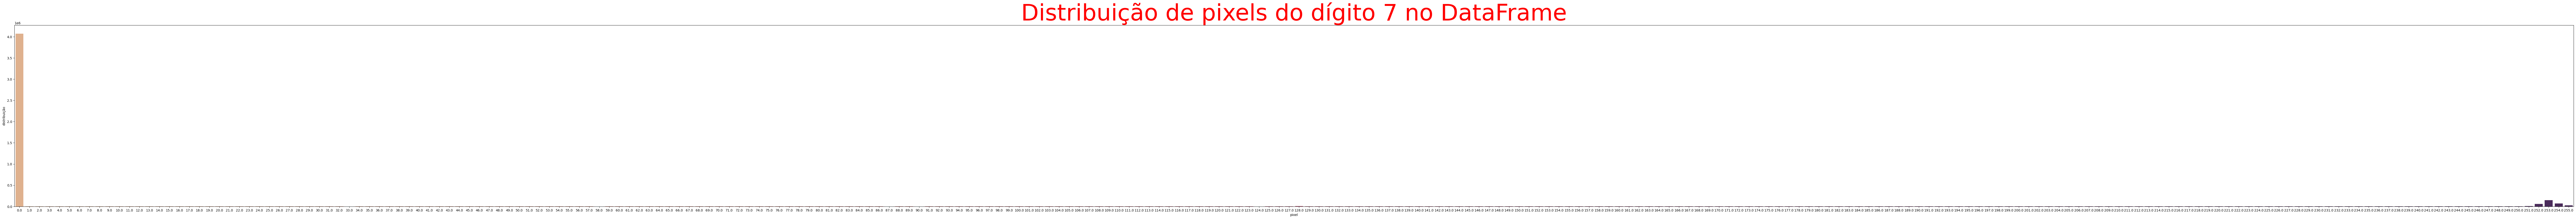

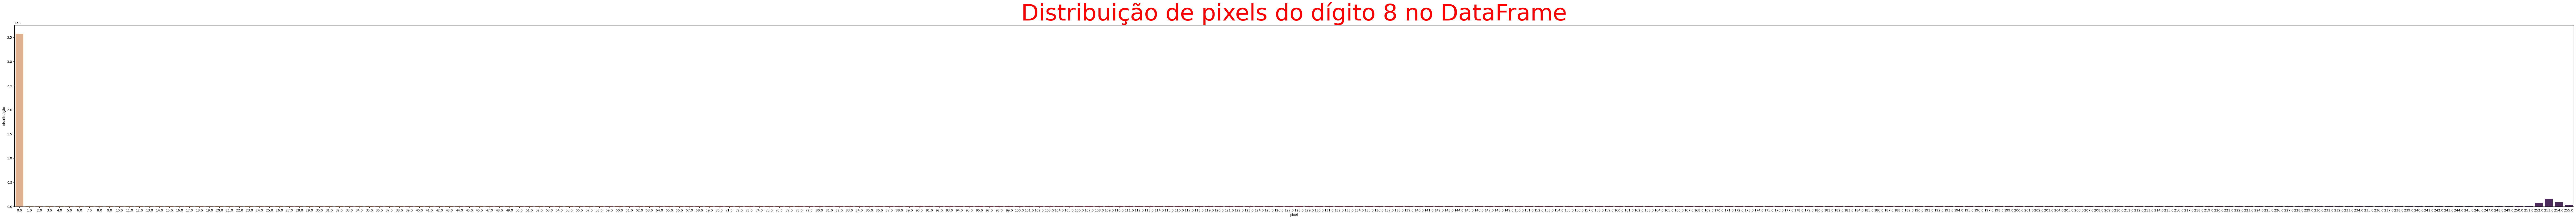

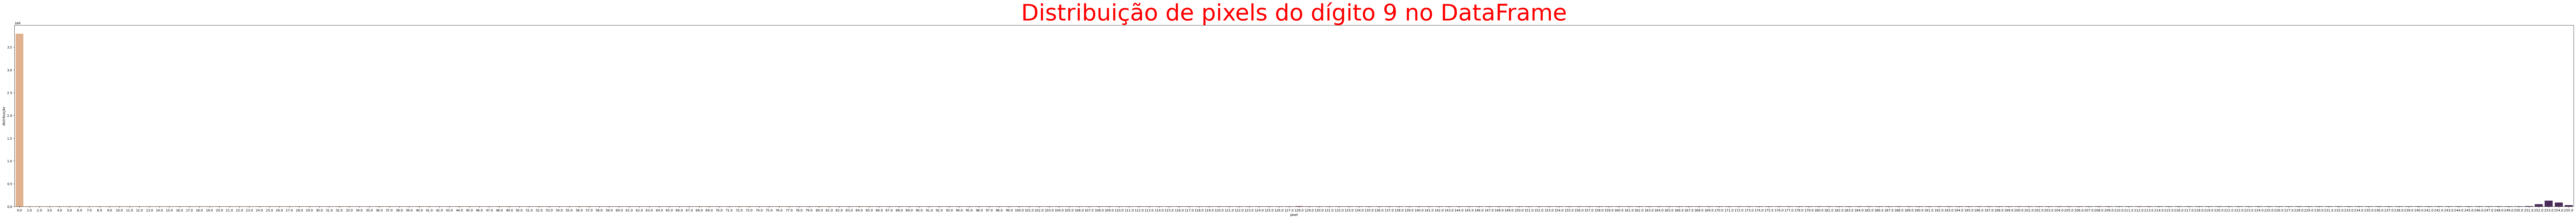

In [31]:
"""
Impressão dos histogramas de distribuição
"""

Plot_Dist_Pixel_Digit(X_tot, y_tot, 256)

In [32]:
"""
Plot_Px

Recebe um dataset de imagens, um dataset de targets respectivos, o Pixel requisitado e o número de pixels possíveis (Com placeholder 256 pixels)
Retorna um histograma com as distribuições do píxel
"""

def Plot_Px(Dataset_Img, Dataset_Target, px, n = 256):
    if px >= n:
        print("Erro: o pixel requisitado é maior do que os possíveis")
        return
    
    # Setagem da Matriz de Distribuições
    Matriz_Dist = Dist_Pixel_Digit(Dataset_Img, Dataset_Target, n)

    # Setagem dos Zeros
    zeros = np.zeros(len(Matriz_Dist))

    for i in range(len(zeros)):
        zeros[i] = Matriz_Dist[i][px]

    # Setagem dos Valores
    val = np.zeros(len(Matriz_Dist))

    for i in range(len(zeros)):
        val[i] = i

    subtitle = "Distribuição do Pixel " + str(px)
    # Setagem do DataFrame
    df = pd.DataFrame({
        "Dígito" : val,
        subtitle : zeros
    })

    # Plotagem
    sns.barplot(df, x = "Dígito", y = subtitle, palette = sns.color_palette("Reds", len(zeros)))

    title = "Distribuição do pixel " + str(px) + " no Dataset"
    plt.title(title, fontsize=16, color='red')
    plt.show()

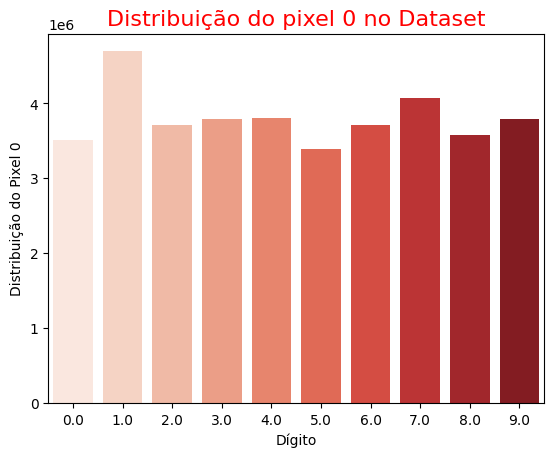

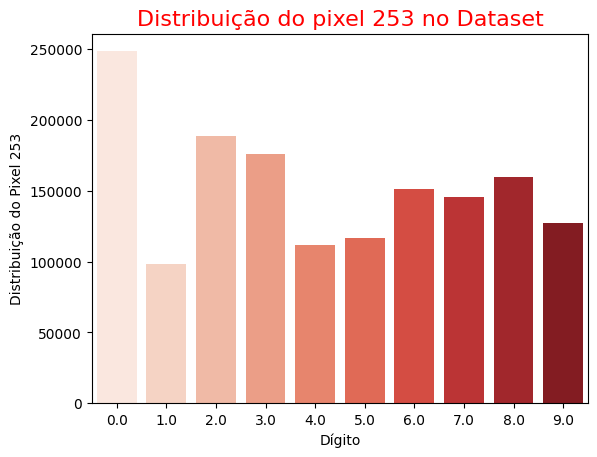

In [33]:
Plot_Px(X_tot, y_tot, 0)
Plot_Px(X_tot, y_tot, 253)

# Zero à Esquerda

Como possível analisar dos histogramas de distribuição, notamos uma expressiva e massiva quantidade de zeros como pixel principal nos dígitos. Todos eles chegando à casa dos milhões.

Também fizemos um bar plot com todos os dígitos. Observe que, em concordância com o observado no item 1b, os valores com maior predominância de pixels zeros são o "1" e o "7", passando os 4 milhões de pixels. Por outro lado, os com menor predominância são o "0" e o "8". Ainda assim, todos possuem mais de 3 milhões de pixels zerados.

O próximo pixel mais bem requisitado, em todos os dígitos, foi o 253. Contudo, sua frequência foi menor do que 250000. Os que mais utilizaram esse pixel foram o "0" e o "2", com destaque para o primeiro com mais de 200000 representantes. Por outro lado, o que menos requisitou foi o "1", com cerca de 100000 representantes.

Assim, em suma, verificamos uma grande disparidade de distribuição de dígitos, havendo bem mais pixels apagados.

## 🤓 Item c)



Crie uma imagem para cada dígito (de 0 a 9) em que cada píxel dessa nova imagem representa a média do valor dos píxeis para aquela classe. Você consegue reconhecer os dígitos nas imagens criadas?

In [34]:
"""
Transform_To_Np_Array

Recebe uma matriz de imagens
Retorna sua versão com np.array
"""

def Transform_To_Np_Array(Matriz_Img):
    return np.array(Matriz_Img)

In [35]:
"""
Find_Mean

Recebe uma matriz de soma de outras imagens
Retorna outra imagem com a média de cada pixel, dada a quantidade de imagens somadas
"""

def Find_Mean(Matriz_Img, num_of_rep):

    for linha in Matriz_Img:
        for px in linha:
            px /= num_of_rep

    return Matriz_Img

In [36]:
"""
Mean_Img_Class

Recebe um Dataset de Imagens, um dataset respectivo de targets e uma classe requirida
Itera por todas as imagens daquela classe
Retorna a imagem média da classe
"""

def Mean_Img_Class(Dataset_Img, Dataset_Target, Classe):

    # Setagem da imagem inicial (zerada)
    Matriz_res = np.zeros((len(Dataset_Img[0]), len(Dataset_Img[0][0])))
    num_of_rep = 0

    for i in range(len(Dataset_Target)):
        if Dataset_Target[i] == Classe:
            Img_np = Transform_To_Np_Array(Dataset_Img[i])
            Matriz_res += Img_np
            num_of_rep += 1

    return Find_Mean(Matriz_res, num_of_rep)

In [37]:
"""
Mean_Img_Digit

Recebe um Dataset de Imagens e um dataset respectivo de targets
Retorna uma matriz com as imagens médias de cada dígito
"""

def Mean_Img_Digit(Dataset_Img, Dataset_Target):

    # Setagem dos labels para um Dataframe
    df = pd.DataFrame({
        "label" : Dataset_Target
    })

    # Setagem dos dígitos
    digits = df['label'].unique()
    digits_sort = np.sort(digits)

    Matriz_res = []

    for Classe in digits_sort:
        Matriz_res.append(Mean_Img_Class(Dataset_Img, Dataset_Target, Classe))

    return Matriz_res

In [38]:
"""
Plot_Mean_Img

Recebe um Dataset de Imagens e um dataset respectivo de targets
Faz a plotagem de cada imagem média
"""

def Plot_Mean_Img(Dataset_Img, Dataset_Target):

    Matriz_res = Mean_Img_Digit(Dataset_Img, Dataset_Target)
    
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))

    for i in range(10):
        row = i // 5  # Linha para o subgráfico (0 ou 1)
        col = i % 5   # Coluna para o subgráfico (0-4)
        
        axs[row, col].imshow(Matriz_res[i], cmap=plt.cm.gray)
        axs[row, col].axis('off')  # Desativa os eixos
        
        # Título para cada subgráfico
        axs[row, col].set_title(f"Dígito {i}", fontsize=14, color='red')

    # Ajuste de layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

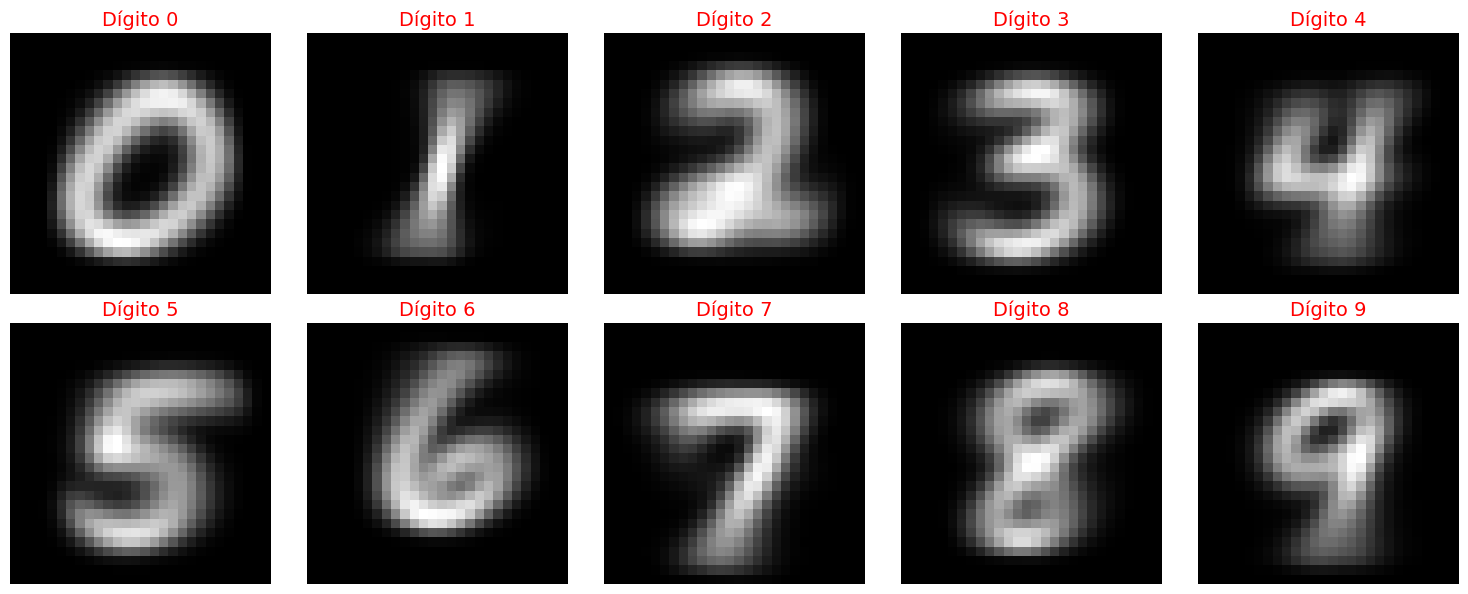

In [39]:
"""
Plotagem de Resultados

A seguir, vamos plotar as imagens médias obtidas de cada dígito [0 - 9]
"""

Plot_Mean_Img(X_tot, y_tot)

# Resultados e Imagens Médias

As imagens obtidas foram satisfatórias e permitem a sua identificação, embora com um grau significativo de névoa. 

Curiosamente, a técnica *inpainting* diz respeito a reparos de imagens digitais com o uso da média de pixels vizinhos de um pixel que destoa da imagem. 

---

# 3️⃣ Tarefa 03: Treinamento e Teste de Modelos 🤖

## Setagem de Dados

Nesse pré-processamento, vamos achatar e normalizar os dados.

Posteriormente, vamos reparticionar os dados em teste e treino.

In [40]:
"""
Achata_Dataset


Recebe um dataset tridimensional (que contenha matrizes de imagens)
Retorna um novo Dataset bidimensional (que contenha "vetores" de imagens)
"""

def Achata_Dataset(Dataset_Img):
    New_Dataset = np.zeros((len(Dataset_Img), len(Dataset_Img[0])*len(Dataset_Img[0][0])))
    
    for i in range(len(Dataset_Img)):
        New_Dataset[i] = Dataset_Img[i].flatten()

    return New_Dataset

In [41]:
"""
Particiona_Dataset

Recebe um Dataset de imagens e outro com seus respectivos targets. Adicionalmente, pode-se especificar o tamanho e o valor de aleatoriedade, 
    Setados, por default, como 0.25 e 42, respectivamente.
Retorna um particionamento com Dados de Treino, Dados de Teste, Target de Treino e Target de Teste
"""

def Particiona_Dataset(Dataset_Img, Dataset_Target, size = 0.25, random = 42):

    New_Dataset_Img = Achata_Dataset(Dataset_Img) # Torna o dataset bidimensional
    X_train, X_test, y_train, y_test = train_test_split(New_Dataset_Img, y_tot, test_size=size, random_state=random)    

    return X_train, X_test, y_train, y_test

In [42]:
"""
Normalize

Recebe um Dataset de imagens
Normaliza os dados para melhorar o desempenho da rede
Retorna um Dataset normalizado
"""

def Normalize(Dataset_Img):

    scaler = StandardScaler()
    New_Dataset = scaler.fit_transform(Dataset_Img)

    return New_Dataset

In [43]:
"""
Binary_Change

Recebe um Dataset de imagens
Transforma pixels claros [128 - 255] em 1 e escuros [0 - 127], em 0
Retorna esse novo Dataset
"""

def Binary_Change(Dataset_Img):

    New_Dataset = np.zeros((len(Dataset_Img), len(Dataset_Img[0])))

    limiar = 128
    
    for i in range(len(Dataset_Img)):
        New_Dataset[i] = (Dataset_Img[i] >= limiar).astype(int)

    return New_Dataset

In [44]:
"""
Preprocessamento

Recebe um dataset de treino e um de teste
Retorna os datasets de treino e de teste normalizados
"""

def Preprocessamento(X_train, X_test):

    New_Train = Normalize(X_train)
    New_Test = Normalize(X_test)

    #New_Train = Binary_Change(New_Train)
    #New_Test = Binary_Change(New_Test)

    return New_Train, New_Test

In [45]:
"""
Repartição da Base de Dados de Treinamento e de Testes
"""

X_train, X_test, y_train, y_test = Particiona_Dataset(X_tot, y_tot, 0.15, hash) # Particionamento de Dados
Backup_X_test = X_test # Backup antes de processar os dados
X_train, X_test = Preprocessamento(X_train, X_test)

## 📈 Item a)



Treine a ANN1 com 784 entradas, 8 neurônios na 1⁠ª camada oculta, 8 neurônios na 2⁠ª camada oculta e 10 saídas. Utilize 5 épocas para o treinamento. Use a biblioteca `scikit-learn`:



- Input Layer: 784 entradas (28x28);

- Hidden Layer 1: 8 neurônios;

- Hidden Layer 2: 8 neurônios;

- Output Layer: 10 saídas; (Classificador 0-9)

- Treine com 10 épocas.

In [46]:
# Criando e treinando o modelo de rede neural
modelo_ItemA = MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=10, random_state=hash)

# Treinando o modelo
modelo_ItemA.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=10, random_state=30)

Métricas

Acurácia: 0.9147
Precisão: 0.9136
Revocação: 0.9135
F1: 0.9135



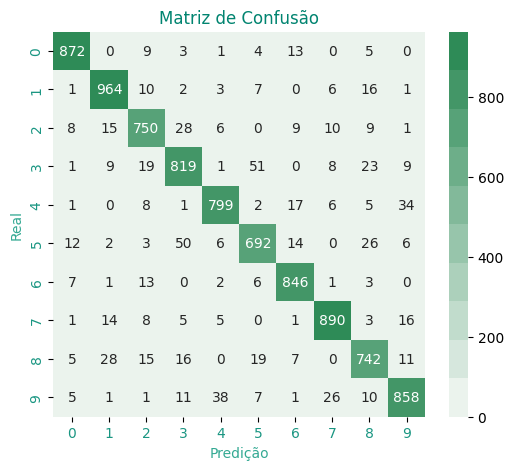

In [47]:
"""
Avaliação do Modelo
"""

# Fazer previsões do conjunto de teste
y_pred = modelo_ItemA.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

cm = confusion_matrix(y_test, y_pred)

# Impressões
print('Métricas\n')
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision_macro:.4f}')
print(f'Revocação: {recall_macro:.4f}')
print(f'F1: {f1_macro:.4f}\n')

# Plotando a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap = sns.light_palette("seagreen", 10), xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.xlabel('Predição', color = '#34a993')
plt.ylabel('Real', color = '#34a993')
plt.xticks(color='#1a9682')
plt.yticks(color='#1a9682')
plt.title('Matriz de Confusão', color = '#018470')
plt.show()

## 📉 Item b)



Treine a ANN2 com 784 entradas, 256 neurônios na 1⁠ª camada oculta, 256 neurônios na 2⁠ª camada oculta, 256 neurônios na 3ª camada oculta, 256 neurônios na 4ª camada oculta e 10 saídas. Utilize 20 épocas dessa vez. Use a biblioteca `scikit-learn`.



- Input Layer: 784 entradas (28x28);

- Hidden Layer 1: 256 neurônios;

- Hidden Layer 2: 256 neurônios;

- Hidden Layer 3: 256 neurônios;

- Hidden Layer 4: 256 neurônios;

- Output Layer: 10 saídas; (Classificação 0-9)

- Treine com 20 épocas.

In [48]:
# Criando e treinando o modelo de rede neural
modelo_ItemB = MLPClassifier(hidden_layer_sizes=(256, 256, 256, 256), max_iter=20, random_state=hash)

# Treinando o modelo
modelo_ItemB.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 256, 256, 256), max_iter=20,
              random_state=30)

Métricas

Acurácia: 0.9751
Precisão: 0.9748
Revocação: 0.9751
F1: 0.9749



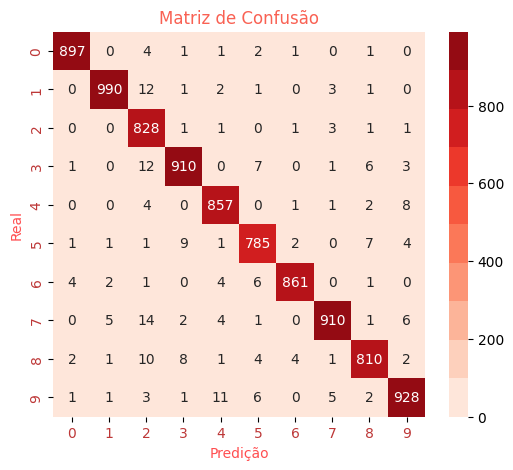

In [49]:
"""
Avaliação do modelo
"""

# Fazer previsões do conjunto de teste
y_pred = modelo_ItemB.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

cm = confusion_matrix(y_test, y_pred)

# Impressões
print('Métricas\n')
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision_macro:.4f}')
print(f'Revocação: {recall_macro:.4f}')
print(f'F1: {f1_macro:.4f}\n')

# Plotando a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap = sns.color_palette("Reds", 10), xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.xlabel('Predição', color = '#ff4e50')
plt.ylabel('Real', color = '#ff4e50')
plt.xticks(color='#bd3737')
plt.yticks(color='#bd3737')
plt.title('Matriz de Confusão', color = '#f96153')
plt.show()

## ⚙️ Item c)



Agora você treinará um novo modelo, mais adequado. Para isso, gere ao menos 5 configurações de redes neurais, variando o número de camadas ocultas, o número de neurônios e o número de épocas. As configurações devem estar intermediárias entre `[8, 8]` e `[256, 256, 256, 256]`.



Utilize a função `GridSearchCV` para realizar uma busca exaustiva pelos hiperparâmetros e encontre a configuração que oferece o melhor classificador, justificando sua escolha com base nas métricas de validação.

## Métricas

Aplicando GridSearchCV, vamos investigar os melhores parâmetros para o nosso modelo.

Os parâmetros serão:

Hidden Layer Sizes | Number of Epochs | Activation Function | Otimizador
:-: | :-: | :-: | :-:
[8, 256] | {15, 20, 25} | {ReLu} | {Adam}

A descrição da escolha do modelo está abaixo, junto com cada configuração

In [50]:
"""
Setagem de Parâmetros
"""

params = {
    'hidden_layer_sizes': [
        (128, 256), # Modelo simples, mas, com camadas robustas, em relação ao item (a)
        (256, 256), # Modelo simples, mas, com camadas robustas
        (64, 64, 128), # Modelo intermediário
        (32, 32, 64, 64),  # Modelo intermediário
        (128, 128, 256, 256) # Modelo bem robusto, mas, mais simples que o item (b)
    ],
    'max_iter': [10, 15, 20],  # Número máximo de iterações para treinamento (Vou evitar aumentar muito as épocas para não resultar em overfitting, 
                                # uma vez que poseríamos ter um bom sobreajuste por dar ênfase aos dados de treino)
    'activation' : ['relu'], # Função de Ativação
    'solver' : ['adam'], # Otimizador
    'early_stopping' : [True], # Para evitar overfitting
}

In [51]:
"""
Busca com uso do GridSearchCV
"""

model = MLPClassifier()

gs=GridSearchCV(estimator=model, param_grid=params, cv=5) # Cross validation com 5 Folds (O ideal é 5 ou 10)

gs = gs.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py

In [52]:
"""
Avaliação do modelo
"""

# Acessar os melhores parâmetros
print("Melhores parâmetros:", gs.best_params_)

# Acessar a melhor pontuação
print("Melhor pontuação:", gs.best_score_)

# Acessar os resultados da validação cruzada
print("Resultados da validação cruzada:", gs.cv_results_)

Melhores parâmetros: {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': (256, 256), 'max_iter': 20, 'solver': 'adam'}
Melhor pontuação: 0.975
Resultados da validação cruzada: {'mean_fit_time': array([15.44012198, 22.86049824, 29.62742453, 25.45648975, 37.41562214,
       50.81103382, 10.15896449, 14.99684391, 19.66071539,  7.75934653,
       11.7140903 , 15.18870554, 26.32049527, 39.2723269 , 52.0400352 ]), 'std_fit_time': array([0.46808241, 0.67043687, 1.19076948, 0.50396217, 0.15978678,
       0.54286796, 0.42449663, 0.58124135, 1.1644684 , 0.44155201,
       0.57187535, 0.41455981, 0.46472428, 0.55810652, 0.65925218]), 'mean_score_time': array([0.08078609, 0.08006377, 0.090274  , 0.12554741, 0.12055807,
       0.12038913, 0.07135777, 0.05507956, 0.0549901 , 0.04402132,
       0.04408126, 0.04765053, 0.12367849, 0.12202606, 0.13113823]), 'std_score_time': array([0.00233907, 0.00127506, 0.02237824, 0.00892111, 0.00119869,
       0.00135709, 0.02099465, 0.00072714, 0.

## Modelo Preditivo, Eu Escolho Você!

O melhor classificador, após a exautiva busca pelo GridSearchCV foi o modelo com duas camadas. Cada qual contendo 256 neurônios (o que, de fato, é bem denso). Escolheu-se 25 iterações,
sobretudo, porque mais do que isso poderia acarretar num overfitting por parte do modelo por insistir em bem aprender os dados de treinamento.

A função ativadora ficou como a ReLu, e o otimizador, a função adam.

Acima, podemos observar que ela demonstrou uma acurácia de 97%. Melhor dentre todos os modelos comparados.

## 🔧 Item d)



Para os modelos treinados nas questões a) e b), além do classificador encontrado na questão c), compare o desempenho dos modelos, analisando se apresentam *underfitting* ou *overfitting*. Justifique com gráficos e análises.


In [53]:
"""
Setagem do Modelo Competitivo
"""
# Criando e treinando o modelo de rede neural
modelo_ItemC = MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=20, random_state=hash, early_stopping=True)

# Treinando o modelo
modelo_ItemC.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(early_stopping=True, hidden_layer_sizes=(256, 256), max_iter=20,
              random_state=30)

In [54]:
"""
Comparação dos Classificadores
"""
# Modelos
modelos = [modelo_ItemA, modelo_ItemB, modelo_ItemC]

# Setagem
    # Erro Médio
train_mse = []
test_mse = []
    # Acurácia
train_accuracies = []
test_accuracies = []
    # Variância
train_variance = []
test_variance = []
    # Bias
train_bias = []
test_bias = []

# Avaliação e Cálculo da Acurácia, MSE, Variância e Bias
for model in modelos:
    # Prdeição para o conjunto de treino e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Cálculo da acurácia
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Cálculo do MSE
    train_mse_value = mean_squared_error(y_train, y_train_pred)
    test_mse_value = mean_squared_error(y_test, y_test_pred)

    # Cálculo da variância das previsões
    train_variance_value = np.var(y_train_pred)
    test_variance_value = np.var(y_test_pred)

    # Calculando o bias como a diferença média entre as previsões e os valores reais
    train_bias_value = np.mean(y_train_pred - y_train)
    test_bias_value = np.mean(y_test_pred - y_test)

    # Armazenando as métricas
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_mse.append(train_mse_value)
    test_mse.append(test_mse_value)
    train_variance.append(train_variance_value)
    test_variance.append(test_variance_value)
    train_bias.append(train_bias_value)
    test_bias.append(test_bias_value)

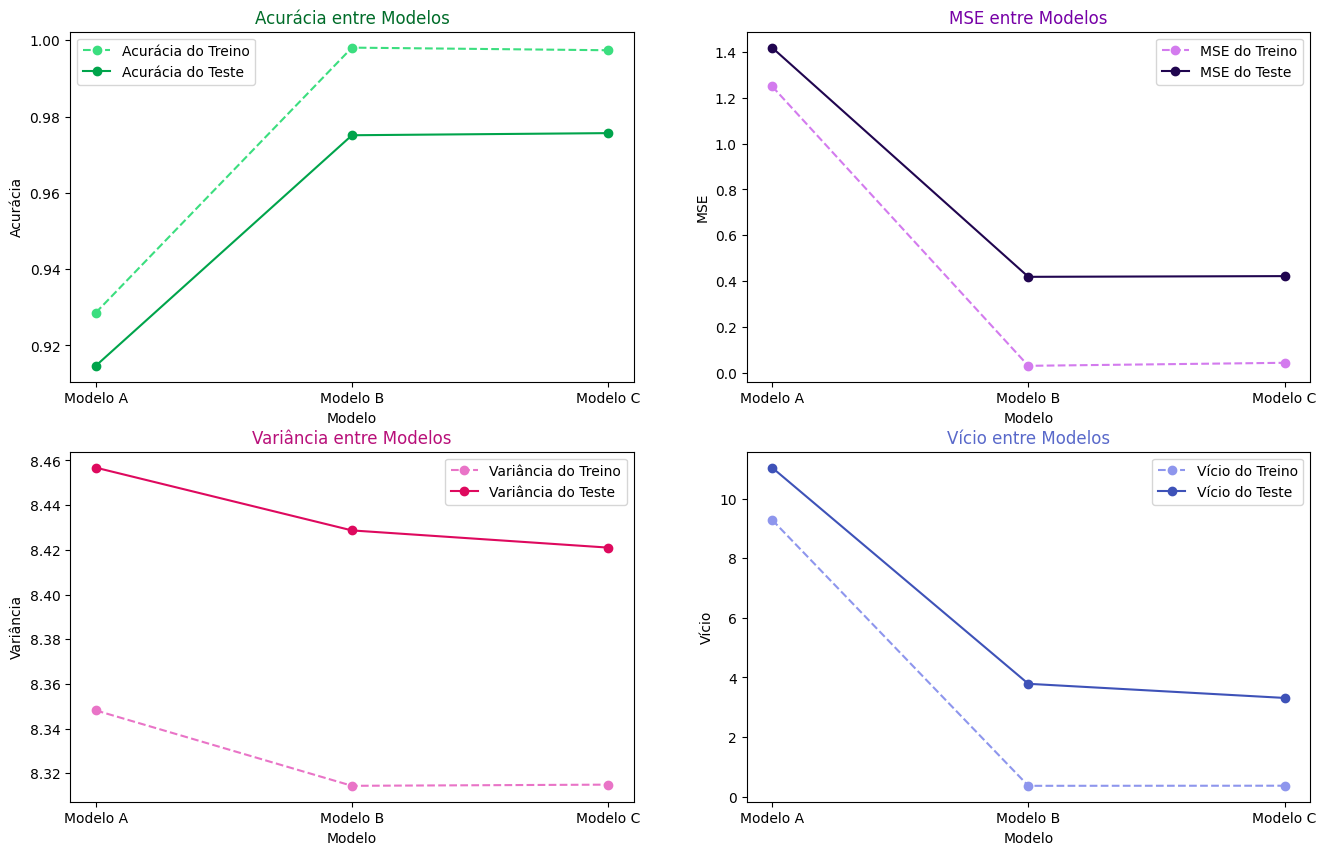

In [55]:
"""
Plotagem
"""

# Plotando gráficos
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico de Acurácia
ax[0][0].plot(['Modelo A', 'Modelo B', 'Modelo C'], train_accuracies, label='Acurácia do Treino', linestyle='--', marker='o', color='#3bde7f')
ax[0][0].plot(['Modelo A', 'Modelo B', 'Modelo C'], test_accuracies, label='Acurácia do Teste', marker='o', color='#00a44b')
ax[0][0].set_title('Acurácia entre Modelos', color = '#006c29')
ax[0][0].set_xlabel('Modelo')
ax[0][0].set_ylabel('Acurácia')
ax[0][0].legend()

# Gráfico de Erro
ax[0][1].plot(['Modelo A', 'Modelo B', 'Modelo C'], train_mse, label='MSE do Treino', linestyle='--', marker='o', color='#d37bee')
ax[0][1].plot(['Modelo A', 'Modelo B', 'Modelo C'], test_mse, label='MSE do Teste', marker='o', color='#20054f')
ax[0][1].set_title('MSE entre Modelos', color = '#7600a6')
ax[0][1].set_xlabel('Modelo')
ax[0][1].set_ylabel('MSE')
ax[0][1].legend()

ax[1][0].plot(['Modelo A', 'Modelo B', 'Modelo C'], train_variance, label='Variância do Treino',linestyle='--', marker='o', color='#e974c7')
ax[1][0].plot(['Modelo A', 'Modelo B', 'Modelo C'], test_variance, label='Variância do Teste', marker='o', color='#de095e')
ax[1][0].set_title('Variância entre Modelos', color = '#b80f79')
ax[1][0].set_xlabel('Modelo')
ax[1][0].set_ylabel('Variância')
ax[1][0].legend()

ax[1][1].plot(['Modelo A', 'Modelo B', 'Modelo C'], train_bias, label='Vício do Treino', linestyle='--', marker='o', color='#8e96ed')
ax[1][1].plot(['Modelo A', 'Modelo B', 'Modelo C'], test_bias, label='Vício do Teste', marker='o', color='#3e52b8')
ax[1][1].set_title('Vício entre Modelos', color = '#5969ca')
ax[1][1].set_xlabel('Modelo')
ax[1][1].set_ylabel('Vício')
ax[1][1].legend()

plt.legend(loc='upper right')

plt.show()

In [56]:
"""
Metricas

Recebe um modelo e uma Letra correspondente associada ao modelo
Faz o cálculo da acurácia, da precisão, da revocação e do f1
Imprime esses resultados no output padrão
"""


def Metricas(modelo, letra):
    # Predição
    y_pred = modelo.predict(X_test)

    # Avaliar o desempenho do modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')

    # Impressões
    print('Métricas do modelo:', letra ,'\n')
    print(f'Acurácia: {accuracy:.4f}')
    print(f'Precisão: {precision_macro:.4f}')
    print(f'Revocação: {recall_macro:.4f}')
    print(f'F1: {f1_macro:.4f}\n')

In [57]:
"""
Comparação de Outras Métricas Interessantes

Vamos imprimir todas as métricas dos três modelos
"""
Letter = ['A', 'B', 'C']

for i in range(len(modelos)):
    Metricas(modelos[i], Letter[i])

Métricas do modelo: A 

Acurácia: 0.9147
Precisão: 0.9136
Revocação: 0.9135
F1: 0.9135

Métricas do modelo: B 

Acurácia: 0.9751
Precisão: 0.9748
Revocação: 0.9751
F1: 0.9749

Métricas do modelo: C 

Acurácia: 0.9757
Precisão: 0.9755
Revocação: 0.9755
F1: 0.9755



## Um Olho na Acurácia e Outro na MSE : Trade-Off!
### Um Homem Quando Está Em Paz, Não Quer Guerra Com Ninguém (😌)

Nos gráficos acima, podemos observar a taxa de acurácia, MSE, variância e bias dos modelos. A começar, o modelo C definiu a maior acurácia entre todos (levemente maior do que o modelo B, e considerável em relação a A).

Assim, quanto à taxa de erros, MSE, consequentemente, o modelo apresentou a menor entre todos. Seguido pelo B e, então, pelo A.

Pela análise do Trade-Off entre variância e bias, podemos notar que o modelo C possui, consideravelmente, pouca variância. Isso significa que é um modelo que apresentar muito pouca sobreposição dos dados de treino e, portanto, seria competitivo para preditar outros dados. Também, em seu treinamento, foram usadas apenas duas camadas de neurônios, ainda que densas (256) e com 20 épocas de treinamento (evitamos aumentar muito esse valor também para reduzir as taxas de overfitting).

O modelo A, por outro lado, apresentou um alto grau de variância e de vício. O que poderia resultar em uma aprendizagem não tão apropriada por não aprender os valores de treino e não conseguir adaptar o aprendizado para outros dados.

O modelo B teve uma variância e um bias moderado.

E o modelo C, teve a menor variância e o menor bias, que permite um modelo não tão apegado aos dados de treino, mas, também que consiga aprender algum padrão.

# 4️⃣ Tarefa 04: Resultados e Visualizações 🤞🏻

## 🐳 Item a)



Gere e apresente uma matriz de confusão que mostre a distribuição das previsões do melhor modelo. Quais as métricas de Acurácia, Precisão, Recall e F1-Score para esse modelo?

In [58]:
"""
Setagem do Melhor Modelo Competitivo
"""

# Criando e treinando o modelo de rede neural
modelo_competitivo = MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=20, random_state=hash, early_stopping=True)

# Treinando o modelo
modelo_competitivo.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(early_stopping=True, hidden_layer_sizes=(256, 256), max_iter=20,
              random_state=30)

Métricas

Acurácia: 0.9757
Precisão: 0.9755
Revocação: 0.9755
F1: 0.9755



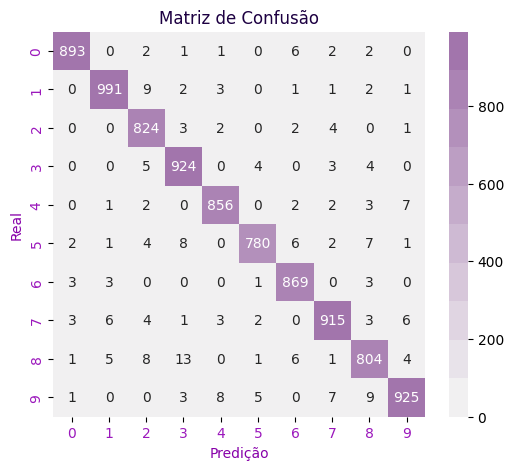

In [59]:
"""
Avaliação do modelo
"""

# Fazer previsões do conjunto de teste
y_pred = modelo_competitivo.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

cm = confusion_matrix(y_test, y_pred)

# Impressões
print('Métricas\n')
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision_macro:.4f}')
print(f'Revocação: {recall_macro:.4f}')
print(f'F1: {f1_macro:.4f}\n')


# Plotando a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap = sns.light_palette("#a275ac", 10), xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.xlabel('Predição', color = '#8700a9')
plt.ylabel('Real', color = '#8700a9')
plt.xticks(color='#9b17bc')
plt.yticks(color='#9b17bc')
plt.title('Matriz de Confusão', color = '#1d0042')
plt.show()

## 🐸 Item b)



Exiba gráficos que mostram a evolução da acurácia e da perda (`Loss`) durante o treinamento do melhor modelo encontrado no item 3c).

In [60]:
"""
Avaliação da Evolução do Modelo Preditivo
"""
perda_Q4b = modelo_competitivo.loss_curve_ # Curva de valores com a Função Perda
acuracia_Q4b = modelo_competitivo.validation_scores_ # Curva de valores com a acurácia

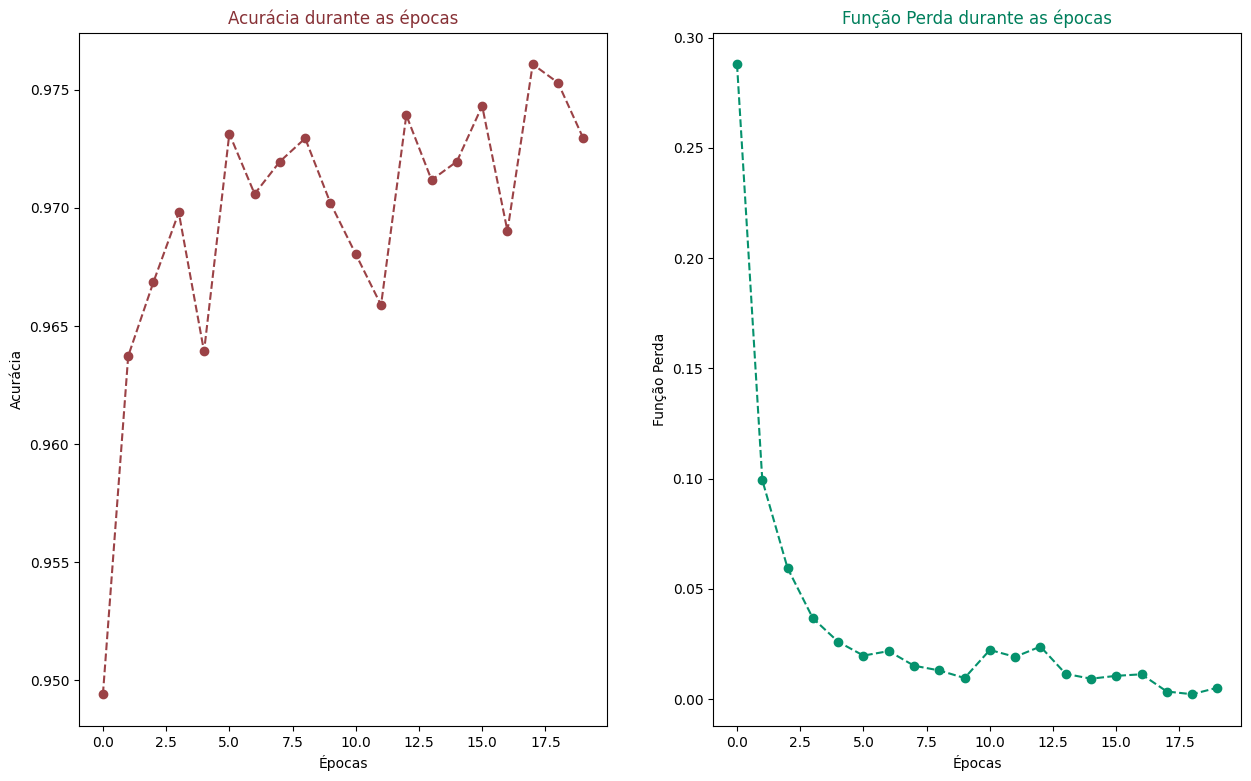

In [61]:
"""
Plotagem 
"""
# Plotando gráficos
fig, ax = plt.subplots(1, 2, figsize=(15, 9))

# Gráfico de Acurácia
ax[0].plot(acuracia_Q4b, linestyle='--', marker='o', color = '#9b4246')
ax[0].set_title('Acurácia durante as épocas', color = '#873136')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('Acurácia')

# Gráfico da Função Loss
ax[1].plot(perda_Q4b, linestyle='--', marker='o', color = '#05926d')
ax[1].set_title('Função Perda durante as épocas', color = '#007f5c')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Função Perda')

plt.show()

## 🦖 Item c)



Escolha algumas imagens do conjunto de teste e mostre previsões do seu modelo, com acertos e erros. Discuta quais fatores podem ter contribuído para essas previsões corretas e incorretas.

In [62]:
"""
Setagem e Partição

Separamos o dataset X_test em acertos e erros
"""
# Fazer previsões do conjunto de teste
y_pred = modelo_competitivo.predict(X_test)

Dataset_Acertos = []
Dataset_Erros = []

for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        Dataset_Acertos.append(i)
    else:
        Dataset_Erros.append(i)

In [63]:
"""
Seleção
"""

Sample_Acertos = np.random.choice(Dataset_Acertos, size=5, replace=False)
Sample_Erros = np.random.choice(Dataset_Erros, size=5, replace=False)

In [64]:
"""
Print_Prediction

Recebe um Dataset de Imagens, um de Target respectivo dessas imagens, um de predição de algum modelo e um array de índices requisitados
Faz a impressão dessas imagens com as labels respectivas
"""

def Print_Prediction(Dataset_Img, Dataset_Target, Dataset_Pred, Array_Index):

    fig, ax = plt.subplots(1, len(Array_Index), figsize=(15, 6))

    for i in range(5): 
        ax[i].imshow(Dataset_Img[Array_Index[i]].reshape(28, 28), cmap=plt.cm.gray)
        ax[i].axis('off')  # Desativa os eixos
        
        # Título para cada subgráfico
        ax[i].set_title(f"Valor Correto: {Dataset_Target[Array_Index[i]]}\nValor Preditado: {Dataset_Pred[Array_Index[i]]}", fontsize=14, color='#0a4243')

    # Ajuste de layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

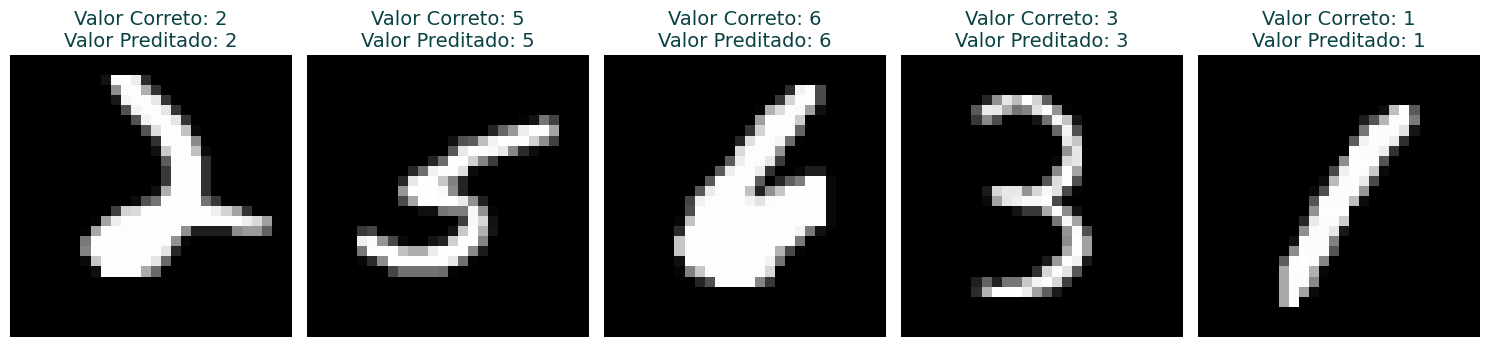

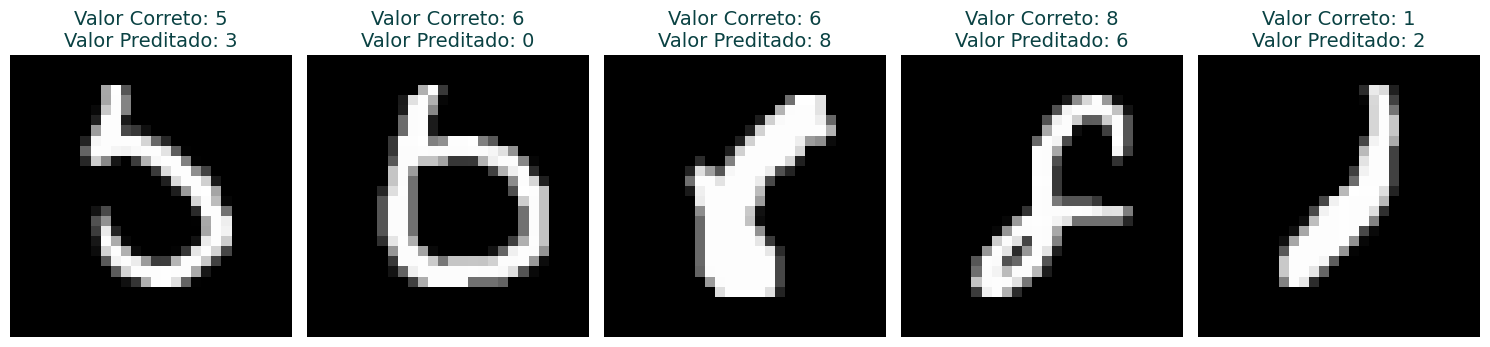

In [65]:
"""
Impressão de Resultados
"""

Print_Prediction(Backup_X_test, y_test, y_pred, Sample_Acertos)
Print_Prediction(Backup_X_test, y_test, y_pred, Sample_Erros)

# Análise De Resultados

## Valores Corretos

As imagens obtidas pela amostra mostram dígitos próximos aos definidos pela média no EDA deste Notebook.

### Valores Corretos

Dígito | Análise
:-: | :-: 
4 | Esse dígito tem a parte superior mais separada (em discrepância ao quatro da fonte de letra desse Notebook), tal como a média das imagens. Apesar de parecer mais a letra "H", ela é bem definida e dificilmente semelhante a outro dígito. Comumente confundido com o dígito "9".
9 | Comumente confundido com o "8" ou com o "4", essa imagem, contudo, é bem mais definida. A parte inferior do dígito é mais ereta, evitando confusão com o "8". E a parte superior, mais fechada, evitando confusão com o "4".
5 | Comumente confundido com o "8" e com o "3". Essa imagem possui a linha do topo do cinco bem comprida e bem definida para a direita. Além da parte inferior separada da curva e do tronco do dígito. Evitando confusão com outros dígitos.
6 | Apesar de mais inclinada à esquerda do que a média das imagens, com uma curva superior mais bem definida e distinta da barriga, essa imagem teve um shape bem mais próximo à média das imagens. Isso evitou ser confundida com"8".
2 | Essencialmente, a imagem média indica um dois curvado (em discrepância ao dois da fonte de letra desse Notebook). Assim, bem definida essa curva, além da parte superior distinta à barriga, o modelo conseguiu predizer o valor corretamente.

### Valores Incorretos

Valor Correto | Predição | Análise
:-: | :-: | :-:
5 | 3 | Como descrito acima, o cinco é comumente confundido com o valor "3". Nesse imagem, o topo do cinco é curto e possui recuo para a esquerda. Assim, a parte inferior parece a cauda do 3 e o topo, a curva superior. A imagem média do três é assim, enquanto do cinco tem o topo mais bem definido.
5 | 8 | Como descrito acima, o cinco é comumente confundido com o valor "8". Nessa imagem, o valor está inclinado à esquerda. A parte superior é curvada, com um gancho. Assim, somado a uma curva aberta natural inferior do 5, a parte superior também se assemelha a uma curva. E a imagem média com essas duas circunferências é o "8".
9 | 5 | O "9", à diferença da imagem média, possui a parte superior bem distinta da continuação da cabeça. Isso se assemelha ao topo e o corpo do "5". E a sua inclinação à esquerda permite que sua parte inferior ereta traceje como uma curva do "5".
5 | 1 | A imagem não define uma curva da parte inferior do "5", apesar do gancho. E o corpo ereto de ligação do tronco e do topo do "5" (definido com uma leve traço) se assemelha a um único traço. O que poderia se assemelhar à imagem média do "1" e do "7". Como não há um topo, então, o modelo preditou "1".
9 | 4 | Comumente confundidos, nessa imagem, o topo do "4" não está tão separado como na imagem média. Assim, com o corpo ereto e uma cabeça com tracejos de uma circunferência, o modelo preditou o número "9".

---

# 5️⃣ Tarefa 05: Lembrete *Kaggle* e Documentação 🗃️

## 😮‍💨 Item a)



# Lembre-se de publicar no *Kaggle* com o título correto e padronizado!

In [66]:
"""
Publicação Para o Kaggle
"""

# Treinamento do Modelo Final
modelo_preditivo = MLPClassifier(hidden_layer_sizes=(256, 256), max_iter=20, random_state=hash, early_stopping=True)

# Treinando o modelo
modelo_preditivo.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(early_stopping=True, hidden_layer_sizes=(256, 256), max_iter=20,
              random_state=30)

In [67]:
"""
Processamento de Dados
"""

X_Achatado = Achata_Dataset(X_val)
X = Normalize(X_Achatado)

In [68]:
"""
Cálculo de Resultados
"""

# Calcula as previsoes
previsoes = modelo_competitivo.predict(X)

In [69]:
"""
Organização do Dataset
"""

test_answers = y_test.copy()
id = np.arange(1, 10001)

submissao = pd.DataFrame({'ID': id, 'Answer': previsoes})

In [70]:
"""
Transformação em CSV e Revisão
"""

submissao.to_csv('submission.csv', index=False)
submissao.head()

,ID,Answer
0,1,8
1,2,4
2,3,8
3,4,7
4,5,7


## 🙏🏻 Item b)



# Lembre-se de documentar adequadamente seu código e conclusões!